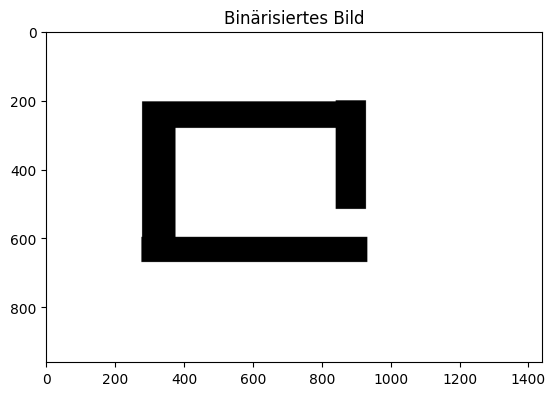

In [ ]:
from PIL import Image
#Bilder zu öffnen und bearbeiten 
import numpy as np
#Konvertieren des Bildes in ein Array
import matplotlib.pyplot as plt
#Visualiesierung 
import heapq
#Implementierung eine Heap-Datenstruktur für A* Algorithmus 

# Bild laden
image_path = 'Hindernisumgebung.png'
image = Image.open(image_path).convert('L')  
# In Graustufen konvertieren, wodurch Intensität jedes Pixels zwischen 0(Schwarz) und 255(weiß)

# Bild in numpy Array konvertieren
image_array = np.array(image)

# Binärisieren des Bildes (Schwarz = Hindernisse, Weiß = freie Fläche)
# Schwellenwert setzen: alle Werte unter 128 als 1 (Hindernis), sonst 0 (frei)
threshold = 128
binary_array = (image_array < threshold).astype(int)

# Array anzeigen
plt.imshow(binary_array, cmap='gray_r')
plt.title("Binärisiertes Bild")
plt.show()

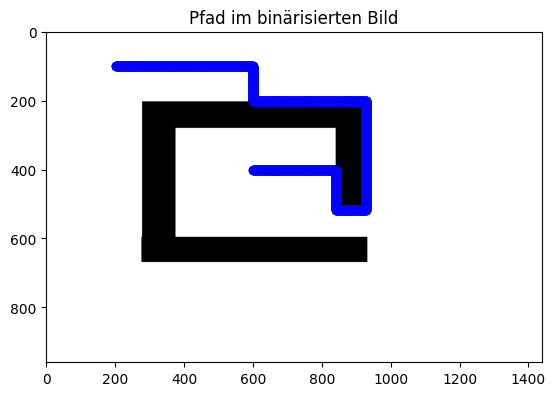

In [ ]:
# A* Algorithmus
def astar(array, start, goal):
    neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    #Mögliche Bewegungen
    close_set = set()
    #Menge besuchte Knoten
    came_from = {}
    #Diktionary zur Rückverfolgung des Pfades 
    gscore = {start: 0}
    #Kosten vom Startknoten zu allen anderen Knoten
    fscore = {start: heuristic(start, goal)}
    #Schätzung der Gesamtkosten vom Startknoten zum Zielknoten.
    oheap = []
    #Priority-Queue, um den nächsten zu erkundenden Knoten basierend auf fscore zu verwalten
    heapq.heappush(oheap, (fscore[start], start))
    #zum Hinzufügen und Entfernen von Elemente aus 
    while oheap:
        current = heapq.heappop(oheap)[1]
        
        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data[::-1]
        
        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j            
            tentative_g_score = gscore[current] + 1
            
            if 0 <= neighbor[0] < array.shape[0]:
                if 0 <= neighbor[1] < array.shape[1]:                
                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue
                else:
                    continue
            else:
                continue
            
            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue
            
            if tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1] for i in oheap]:
                #Geschätzte Kosten für den aktuellen Knoten
                #Der Pfad wird zurückverfolgt und zurückgegeben, wenn der Zielknoten erreicht wird
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor))
    
    return False
#heuristic: Berechnet die Manhattan-Distanz zwischen zwei Punkten, um die Effizienz des A* Algorithmus zu verbessern.
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# Start- und Endpunkte definieren
start = (100, 200)  # gewählte Startpunkt
end = (400, 600)  # gewählte Endpunkt

# Der A* Algorithmus wird aufgerufen, um den kürzesten Pfad vom Start- zum Endpunkt zu finden.
path = astar(binary_array, start, end)

# Pfad visualisieren
plt.imshow(binary_array, cmap='gray_r')
if path:
    path = np.array(path)
    plt.plot(path[:, 1], path[:, 0], color='blue', marker='o')  # Beachte: (y, x) für matplotlib
plt.title("Pfad im binärisierten Bild")
plt.show()
